In [11]:
from pathlib import Path
import polars as pl
import plotnine as p9
from mizani.formatters import custom_format, comma_format

from ug2021.data.results import (
    polling_station_results,
    stations_long,
    stations_wide,
    parishes_wide,
    parishes_long,
    subcounties_wide,
    subcounties_long,
    constituencies_wide,
    constituencies_long,
    districts_wide,
    districts_long,
    national_wide,
    national_long,
)
from ug2021.data.results import (
    CANDIDATE_COLS
)

candidate_colors = {
    "Museveni": "#F3C02A",
    "Kyagulanyi": "#E41E2F",
    "Amuriat": "#006BFF",
    "Muntu": "#9954AD",
    "Mao": "#028100",
    "Tumukunde": "gray",
    "Kabuleta": "gray",
    "Kalembe": "gray",
    "Katumba": "gray",
    "Mwesigye": "gray",
    "Mayambala": "gray",
}


In [5]:
national_long

registered,valid,invalid,total,turnout,candidate,votes,won,rank
i64,i64,i64,i64,f64,str,i64,bool,i64
18037787,10350819,393500,10744319,59.565616,"""Amuriat""",337589,false,3
18037787,10350819,393500,10744319,59.565616,"""Kabuleta""",45424,false,7
18037787,10350819,393500,10744319,59.565616,"""Kalembe""",38772,false,8
18037787,10350819,393500,10744319,59.565616,"""Katumba""",37554,false,9
18037787,10350819,393500,10744319,59.565616,"""Kyagulanyi""",3631437,false,2
…,…,…,…,…,…,…,…,…
18037787,10350819,393500,10744319,59.565616,"""Mayambala""",15014,false,11
18037787,10350819,393500,10744319,59.565616,"""Muntu""",67574,false,4
18037787,10350819,393500,10744319,59.565616,"""Mwesigye""",25483,false,10


In [12]:
candidate_colors = {
    "Museveni": "#F3C02A",
    "Kyagulanyi": "#E41E2F",
    "Amuriat": "#006BFF",
    "Muntu": "#9954AD",
    "Mao": "#028100",
    "Tumukunde": "gray",
    "Kabuleta": "gray",
    "Kalembe": "gray",
    "Katumba": "gray",
    "Mwesigye": "gray",
    "Mayambala": "gray",
}



In [5]:
national_wide["registered"][0]

18037787

In [16]:
import ug2021.frames as data
from mizani.formatters import custom_format, comma_format

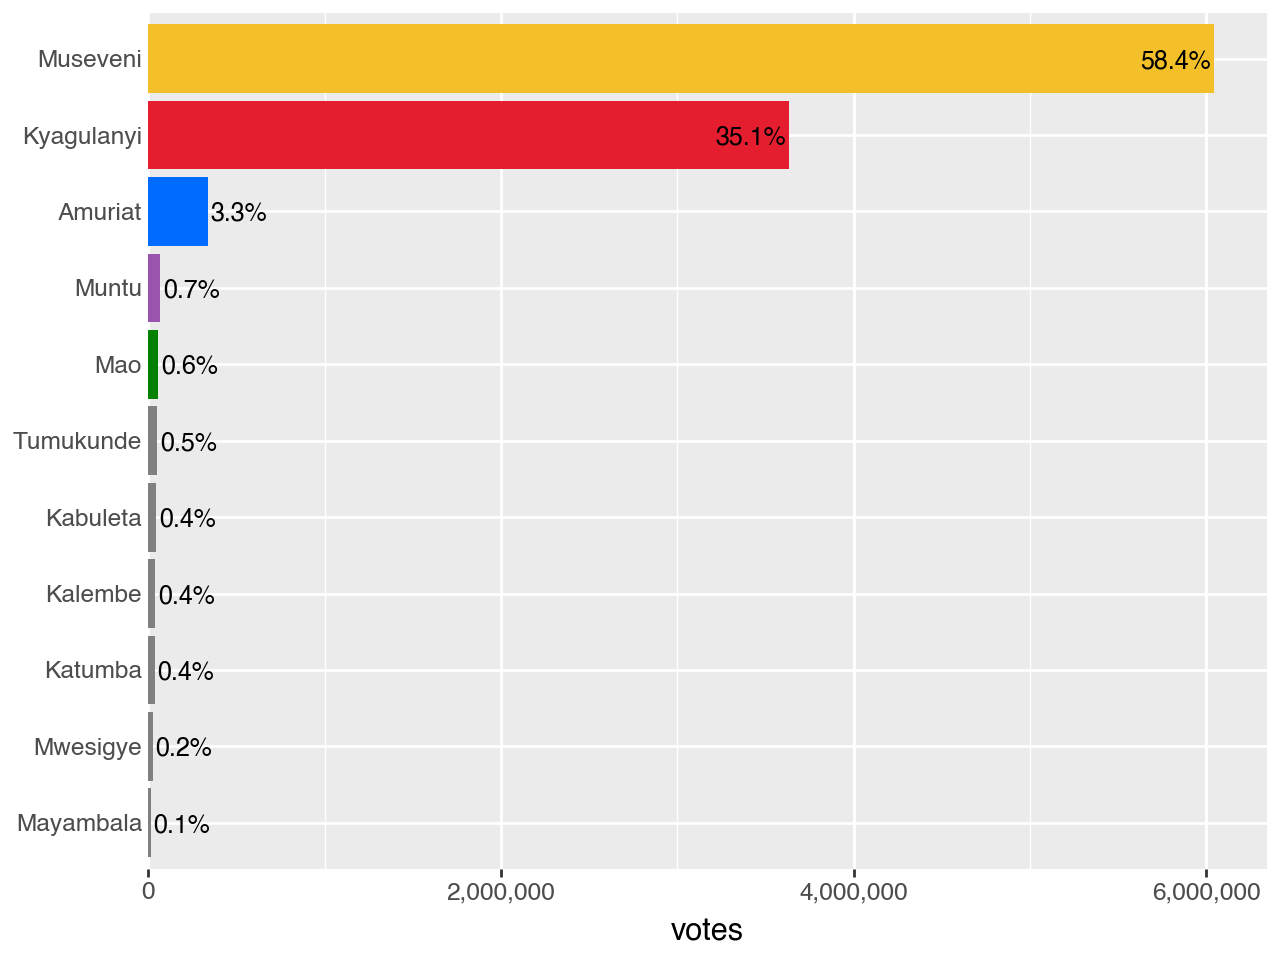

In [65]:
def ha_align_left(s, threshold):
    return ["left" if x <= threshold else "right" for x in s]

def add_plus_minus(s, threshold, amount):
    return [amount if x <= threshold else -amount for x in s]
    
(
    national_long
    >> p9.ggplot(p9.aes("reorder(candidate, votes)", "votes"))
    + p9.geom_col(p9.aes(fill="candidate"), show_legend=False)
    + p9.geom_text(
        p9.aes(
            label="100*votes / valid",
            ha=p9.after_stat("ha_align_left(label, 3.3)"),
            y=p9.stage("votes", "y+add_plus_minus(label, 3.3, 15000)")
        ),
        format_string="{:.1f}%",
        size=9,
        va="center_baseline",
    )
    + p9.scale_y_continuous(expand=(0, 0, .05, 0), labels=comma_format())
    + p9.scale_fill_manual(values=candidate_colors)
    + p9.labs(x="")
    + p9.coord_flip()
    + p9.theme(
        #dpi=200,
        axis_ticks_y=p9.element_blank()
    )
)


In [18]:
districts_long

district,registered,valid,invalid,total,turnout,candidate,votes,won,rank
str,i64,i64,i64,i64,f64,str,i64,bool,i64
"""Abim""",36539,23588,875,24463,66.950382,"""Amuriat""",433,false,3
"""Adjumani""",79364,46421,2540,48961,61.691699,"""Amuriat""",1179,false,3
"""Agago""",98354,63961,2572,66533,67.646461,"""Amuriat""",1595,false,4
"""Alebtong""",115804,65620,3207,68827,59.434044,"""Amuriat""",1920,false,3
"""Amolatar""",71173,51276,1908,53184,74.724966,"""Amuriat""",3349,false,3
…,…,…,…,…,…,…,…,…,…
"""Terego""",95118,48360,4497,52857,55.569924,"""Museveni""",24718,true,1
"""Tororo""",268434,154503,5792,160295,59.714865,"""Museveni""",86248,true,1
"""Wakiso""",1154086,561500,12518,574018,49.737888,"""Museveni""",122505,false,2


In [8]:
stations_wide.head()

district,constituency,subcounty,parish,station,registered,Amuriat,Kabuleta,Kalembe,Katumba,Kyagulanyi,Mao,Mayambala,Muntu,Mwesigye,Tumukunde,Museveni,valid,invalid,total,turnout,winner
str,str,str,str,str,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,f64,str
"""Abim""","""Labwor County""","""Abim""","""Abongepach""","""01-Arembwola Health Centre II""",322,4,1,2,0,37,0,0,0,0,2,133,179,16,195,60.559006,"""Museveni"""
"""Abim""","""Labwor County""","""Abim""","""Adwal""","""01-Omunga Barracks""",114,3,2,0,2,6,2,0,0,0,1,76,92,1,93,81.578947,"""Museveni"""
"""Abim""","""Labwor County""","""Abim""","""Aninata""","""01-Aninata Primary School""",540,4,0,1,2,38,0,0,2,0,1,355,403,7,410,75.925926,"""Museveni"""
"""Abim""","""Labwor County""","""Abim""","""Arembwola""","""01-Arembwola Pri.Sch.""",188,2,0,0,0,27,0,0,0,0,0,86,115,3,118,62.765957,"""Museveni"""
"""Abim""","""Labwor County""","""Abim""","""Arembwola""","""02-Oyompolo""",175,3,1,0,0,26,2,0,4,0,1,81,118,9,127,72.571429,"""Museveni"""


In [7]:

sums = pl.col(
    CANDIDATE_COLS + ["registered", "valid", "invalid", "total"]
).sum()

(
    stations_wide
    .select(sums)
)

Amuriat,Kabuleta,Kalembe,Katumba,Kyagulanyi,Mao,Mayambala,Muntu,Mwesigye,Tumukunde,Museveni,registered,valid,invalid,total
i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64
337589,45424,38772,37554,3631437,57682,15014,67574,25483,51392,6042898,18037787,10350819,393500,10744319


In [25]:
stations_long.group_by("candidate").agg(
    pl.col("votes").sum(),
)


candidate,votes
str,i64
"""Kyagulanyi""",3631437
"""Museveni""",6042898
"""Katumba""",37554
"""Tumukunde""",51392
"""Mayambala""",15014
…,…
"""Mao""",57682
"""Mwesigye""",25483
"""Muntu""",67574


In [29]:
districts_wide.head()

district,Amuriat,Kabuleta,Kalembe,Katumba,Kyagulanyi,Mao,Mayambala,Muntu,Mwesigye,Tumukunde,Museveni,registered,valid,invalid,total,turnout,winner
str,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,f64,str
"""Abim""",433,71,66,179,3956,395,35,63,41,95,18254,36539,23588,875,24463,66.950382,"""Museveni"""
"""Adjumani""",1179,710,325,198,7866,225,81,264,183,265,35125,79364,46421,2540,48961,61.691699,"""Museveni"""
"""Agago""",1595,337,299,202,10559,1834,243,407,356,433,47696,98354,63961,2572,66533,67.646461,"""Museveni"""
"""Alebtong""",1920,604,425,297,16794,446,419,634,389,860,42832,115804,65620,3207,68827,59.434044,"""Museveni"""
"""Amolatar""",3349,218,240,260,7185,206,134,310,289,466,38619,71173,51276,1908,53184,74.724966,"""Museveni"""


In [31]:
districts_long.head()

district,registered,valid,invalid,total,turnout,candidate,votes,won,rank
str,i64,i64,i64,i64,f64,str,i64,bool,i64
"""Abim""",36539,23588,875,24463,66.950382,"""Amuriat""",433,false,3
"""Adjumani""",79364,46421,2540,48961,61.691699,"""Amuriat""",1179,false,3
"""Agago""",98354,63961,2572,66533,67.646461,"""Amuriat""",1595,false,4
"""Alebtong""",115804,65620,3207,68827,59.434044,"""Amuriat""",1920,false,3
"""Amolatar""",71173,51276,1908,53184,74.724966,"""Amuriat""",3349,false,3


In [30]:
stations_long.group_by("candidate", maintain_order=True).agg(
    pl.col("votes").sum(),
)


district,candidate,votes
str,str,i64
"""Abim""","""Amuriat""",433
"""Adjumani""","""Amuriat""",1179
"""Agago""","""Amuriat""",1595
"""Alebtong""","""Amuriat""",1920
"""Amolatar""","""Amuriat""",3349
…,…,…
"""Terego""","""Museveni""",24718
"""Tororo""","""Museveni""",86248
"""Wakiso""","""Museveni""",122505


In [17]:
def get_winners(s: pl.Series) -> str:
    """
    Given a series with candidate totals, return the winner(s) 

    If there are multiple winners, return all as a comma separated string
    """
    return ", ".join([name for won, name in zip(s, CANDIDATE_COLS) if won])

districts_wide = (
    stations_wide
    .group_by("district")
    .agg(
        pl.col(CANDIDATE_COLS + ["registered", "valid", "invalid", "total"]).sum()
    ).with_columns(
        turnout=pl.col("total") * 100 / pl.col("registered"),
        winner=(
            # 1. votes for each candidate
            # 2. whether they won
            # 3. who won
            pl.concat_list(CANDIDATE_COLS)
            .list.eval(pl.element()==pl.element().max())
            .map_elements(get_winners, return_dtype=str)
        )
    )

)
districts_wide

district,Amuriat,Kabuleta,Kalembe,Katumba,Kyagulanyi,Mao,Mayambala,Muntu,Mwesigye,Tumukunde,Museveni,registered,valid,invalid,total,turnout,winner
str,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,f64,str
"""Mayuge""",1005,194,754,423,62938,216,104,313,208,540,50932,231116,117627,4487,122114,52.836671,"""Kyagulanyi"""
"""Kiryandongo""",894,492,175,150,13893,527,67,258,204,288,38083,125685,55031,4662,59693,47.494132,"""Museveni"""
"""Kaliro""",728,126,457,121,27032,122,34,124,247,230,38189,109466,67410,3094,70504,64.407213,"""Museveni"""
"""Kalungu""",119,33,51,81,38352,120,25,97,41,94,16377,88687,55390,1387,56777,64.019529,"""Kyagulanyi"""
"""Hoima City""",292,2285,69,109,11662,51,14,261,32,83,19751,62018,34609,1450,36059,58.142797,"""Museveni"""
…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…
"""Ntungamo""",3227,145,300,802,12503,159,53,7110,218,677,161655,268541,186849,3921,190770,71.039432,"""Museveni"""
"""Bugiri""",1836,256,417,267,49475,279,134,328,226,392,45980,193053,99590,5285,104875,54.32446,"""Kyagulanyi"""
"""Kween""",662,46,112,47,4005,133,28,49,30,105,27467,47080,32684,1038,33722,71.627018,"""Museveni"""


In [28]:
[*set(stations_wide.columns) & set(ADMIN_REGION_COLS)]

['subcounty', 'constituency', 'district', 'station', 'parish']

In [29]:
[*set(districts_wide.columns) & set(ADMIN_REGION_COLS)]

['district']

In [32]:
[*set(districts_wide.columns).intersection(ADMIN_REGION_COLS)]

['district']

In [18]:
districts_long = (
    districts_wide
    .unpivot(
        CANDIDATE_COLS,
        index=ADMIN_REGION_COLS+AGGREGATE_COLS,
        variable_name="candidate",
        value_name="votes"
    )
    .with_columns(
        won=pl.col("votes").max().over(AGGREGATE_COLS) == pl.col("votes"),
        rank=(
            pl.col("votes")
            .rank("min", descending=True)
            .over(AGGREGATE_COLS)
            .cast(int)
        )
    )
)

SchemaFieldNotFoundError: constituency

In [15]:
importlib.resources.as_file(Path("ug2021/resources/polling-station-results.parquet"))

In [13]:
importlib.resources.as_file?

Signature: importlib.resources.as_file(path)
Docstring:
Given a Traversable object, return that object as a
path on the local file system in a context manager.
File:      ~/.local/share/uv/python/cpython-3.13.2-macos-aarch64-none/lib/python3.13/importlib/resources/_common.py
Type:      function

In [17]:
from importlib.resources import files
path = files("ug2021.resources").joinpath("polling-station-results.parquet")
print(f"Path to resource (Path object): {resource_path_obj}")

Path to resource (Path object): /Users/hassan/projects/pydata-uganda/ug2021/src/ug2021/resources/polling-station-results.parquet


In [23]:
from types import SimpleNamespace

import polars as pl

original_data = pl.read_parquet(
    files("ug2021.resources").joinpath("polling-station-results.parquet")
)

columns = SimpleNamespace(
    candidates=list(original_data.columns[6:17]),
    regions=["district", "constituency", "subcounty", "parish", "station"],
    summaries=["registered", "valid", "invalid", "total", "turnout"],
)

def get_winners(s):
    return ", ".join([name for won, name in zip(s, columns.candidates) if won])


# Add columns:
#   - turnout (of polling station)
#   - winner (at the polling station)
polling_stations_wide = (
        original_data
        .filter(pl.col("total") > 0)
        .with_columns(
            turnout=pl.col("total") * 100 / pl.col("registered"),
            winner=(
                pl.concat_list(columns.candidates)  # candidate totals for each station
                .list.eval(pl.element()==pl.element().max())
                .map_elements(get_winners, return_dtype=str)
            )
        )
        
    )

# Make a long form version where the data 
# Add columns:
#   - won ()
#   - rank ()
polling_stations_long = (
    polling_stations_wide
    .unpivot(
        columns.candidates,
        index=columns.regions+columns.summaries,
        variable_name="candidate",
        value_name="votes"
    )
    .with_columns(
        won=pl.col("votes").max().over(columns.summaries) == pl.col("votes"),
        rank=pl.col("votes").rank("min", descending=True).over(columns.summaries).cast(int)
    )
)

In [31]:
polling_stations_wide.group_by(None).agg(
   pl.col(columns.summaries).exclude("turnout").sum(),
   (pl.col("total").sum() / pl.col("registered").sum() * 100).alias("turnout")
)[0, 1:].to_dicts()[0]


{'registered': 18037787,
 'valid': 10350819,
 'invalid': 393500,
 'total': 10744319,
 'turnout': 59.56561633641644}

In [35]:
from ug2021.frames._resources import polling_station_results

In [44]:
polling_station_results.columns[6:17]

['district',
 'constituency',
 'subcounty',
 'parish',
 'station',
 'registered',
 'Amuriat',
 'Kabuleta',
 'Kalembe',
 'Katumba',
 'Kyagulanyi',
 'Mao',
 'Mayambala',
 'Muntu',
 'Mwesigye',
 'Tumukunde',
 'Museveni',
 'valid',
 'invalid',
 'total']

In [39]:
polling_stations_wide.group_by(None).agg(
   pl.col(["registered", "valid", "invalid", "total"]).sum(),
   (pl.col("total").sum() / pl.col("registered").sum() * 100).alias("turnout"),
    (polling_station_results["total"] == 0).alias("a"),
)

literal,registered,valid,invalid,total,turnout,a
null,i64,i64,i64,i64,f64,list[bool]
null,18037787,10350819,393500,10744319,59.565616,"[false, false, … false]"


In [41]:
polling_stations_long.group_by("candidate").agg(
    pl.col("votes").sum(),
)


candidate,votes
str,i64
"""Mayambala""",15014
"""Tumukunde""",51392
"""Kalembe""",38772
"""Muntu""",67574
"""Amuriat""",337589
…,…
"""Katumba""",37554
"""Mao""",57682
"""Kabuleta""",45424


In [40]:
statistics = polling_stations_wide.group_by(None).agg(
    pl.col(["registered", "valid", "invalid", "total"]).sum(),
   (pl.col("total").sum() / pl.col("registered").sum() * 100).alias("turnout")
).with_columns(
    missing_polling_stations=(polling_station_results["total"] == 0).sum()
)[0, 1:].to_dicts()[0]
statistics

{'registered': 18037787,
 'valid': 10350819,
 'invalid': 393500,
 'total': 10744319,
 'turnout': 59.56561633641644,
 'missing_polling_stations': 101}